## PROBLEM DESCRIPTION

### The problem lies in predicting machine failures. We are given logs from a machine. We will first analyse these data files. We should be able to answer the question 'Will a machine fail in the next month, given that we know the behaviour of the machine in failure logs and also given that the routine maintenance logs are available' 

### First lets take a look at the  5 available data sources that are in CSV format

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns =None
pd.options.display.max_rows =40
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#1
mach_df = pd.read_csv('/Users/ravissa/data_cp/PdM_machines.csv')

In [3]:
#2
fail_df = pd.read_csv('/Users/ravissa/data_cp/PdM_failures.csv')

In [4]:
#3
maint_df = pd.read_csv('/Users/ravissa/data_cp/PdM_maint.csv')

In [5]:
#4
err_df = pd.read_csv('/Users/ravissa/data_cp/PdM_errors.csv')

In [6]:
#5
tlmtry_df = pd.read_csv('/Users/ravissa/data_cp/PdM_telemetry.csv')

In [7]:
mach_df.isnull().sum()

machineID    0
model        0
age          0
dtype: int64

In [8]:
fail_df.isnull().sum()

datetime     0
machineID    0
failure      0
dtype: int64

In [9]:
maint_df.isnull().sum()

datetime     0
machineID    0
comp         0
dtype: int64

In [10]:
err_df.isnull().sum()

datetime     0
machineID    0
errorID      0
dtype: int64

In [11]:
tlmtry_df.isnull().sum()

datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
dtype: int64

#### Looks like there are no missing values.

## Telemetry

In [12]:
tlmtry_df.shape

(876100, 6)

In [13]:
tlmtry_df.head(5)

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [14]:
tlmtry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
datetime     876100 non-null object
machineID    876100 non-null int64
volt         876100 non-null float64
rotate       876100 non-null float64
pressure     876100 non-null float64
vibration    876100 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 40.1+ MB


In [15]:
tlmtry_df['datetime'] = pd.to_datetime(tlmtry_df['datetime'], format="%Y-%m-%d %H:%M:%S")

In [16]:
tlmtry_df.head(5)

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [17]:
tlmtry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
datetime     876100 non-null datetime64[ns]
machineID    876100 non-null int64
volt         876100 non-null float64
rotate       876100 non-null float64
pressure     876100 non-null float64
vibration    876100 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 40.1 MB


In [18]:
tlmtry_df.describe()

,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


In [19]:
tlmtry_df.groupby(['datetime']).min()

,machineID,volt,rotate,pressure,vibration
datetime,,,,,
2015-01-01 06:00:00,1,136.878588,360.123537,76.005332,22.973289
2015-01-01 07:00:00,1,129.471596,300.540218,77.519149,29.228292
2015-01-01 08:00:00,1,138.572770,281.659585,71.125279,29.714500
2015-01-01 09:00:00,1,139.092689,297.564301,78.257431,25.923066
2015-01-01 10:00:00,1,138.074836,273.129360,76.874388,25.990511
...,...,...,...,...,...
2016-01-01 02:00:00,1,134.413105,323.611177,79.730379,28.997311
2016-01-01 03:00:00,1,136.402165,326.081119,80.534193,29.342106
2016-01-01 04:00:00,1,129.156343,322.435107,81.228091,29.851334


/Users/ravissa/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


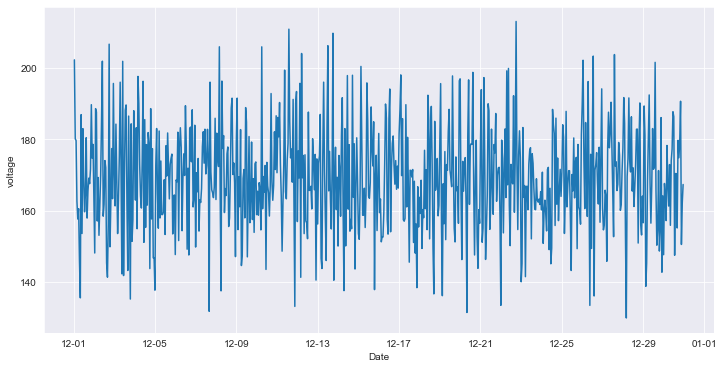

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = tlmtry_df.loc[(tlmtry_df['machineID'] == 100) &
                        (tlmtry_df['datetime'] > pd.to_datetime('2015-12-01')) &
                        (tlmtry_df['datetime'] < pd.to_datetime('2015-12-31')), ['datetime', 'volt']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d'
plt.xlabel('Date')

import warnings
warnings.filterwarnings(action="ignore")

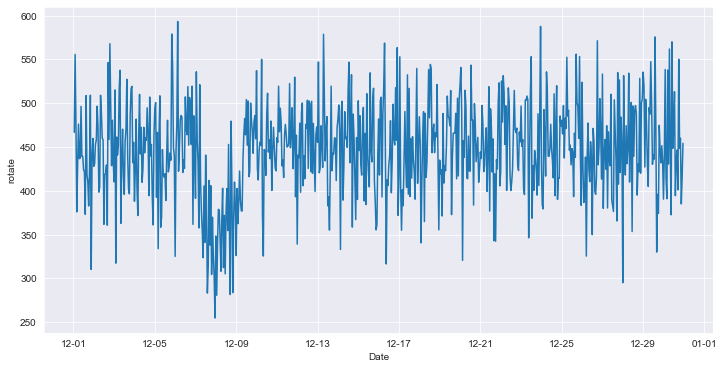

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = tlmtry_df.loc[(tlmtry_df['machineID'] == 100) &
                        (tlmtry_df['datetime'] > pd.to_datetime('2015-12-01')) &
                        (tlmtry_df['datetime'] < pd.to_datetime('2015-12-31')), ['datetime', 'rotate']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['rotate'])
plt.ylabel('rotate')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d'
plt.xlabel('Date')

import warnings
warnings.filterwarnings(action="ignore")

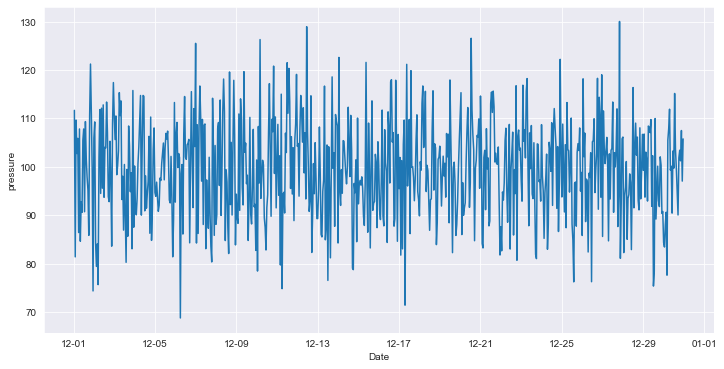

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = tlmtry_df.loc[(tlmtry_df['machineID'] == 100) &
                        (tlmtry_df['datetime'] > pd.to_datetime('2015-12-01')) &
                        (tlmtry_df['datetime'] < pd.to_datetime('2015-12-31')), ['datetime', 'pressure']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['pressure'])
plt.ylabel('pressure')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d'
plt.xlabel('Date')

import warnings
warnings.filterwarnings(action="ignore")

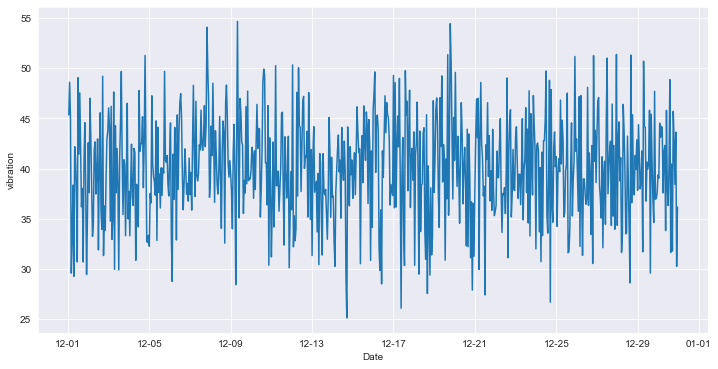

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = tlmtry_df.loc[(tlmtry_df['machineID'] == 100) &
                        (tlmtry_df['datetime'] > pd.to_datetime('2015-12-01')) &
                        (tlmtry_df['datetime'] < pd.to_datetime('2015-12-31')), ['datetime', 'vibration']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['vibration'])
plt.ylabel('vibration')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d'
plt.xlabel('Date')

import warnings
warnings.filterwarnings(action="ignore")

## Failure

In [24]:
fail_df.shape

(761, 3)

In [25]:
fail_df.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [26]:
fail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
datetime     761 non-null object
machineID    761 non-null int64
failure      761 non-null object
dtypes: int64(1), object(2)
memory usage: 18.0+ KB


In [27]:
fail_df['datetime'] = pd.to_datetime(fail_df['datetime'], format="%Y-%m-%d %H:%M:%S")

In [28]:
fail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
datetime     761 non-null datetime64[ns]
machineID    761 non-null int64
failure      761 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 18.0+ KB


In [29]:
fail_df['failure'].value_counts()

comp2    259
comp1    192
comp4    179
comp3    131
Name: failure, dtype: int64

Text(0, 0.5, 'Count')

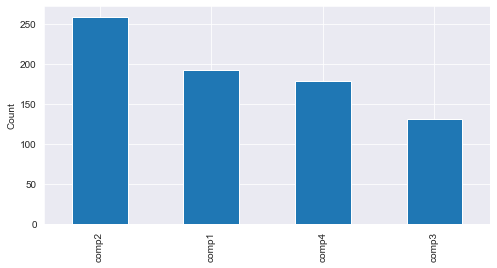

In [30]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
fail_df['failure'].value_counts().plot(kind='bar')
plt.ylabel('Count')

In [31]:
fail_df.groupby(['failure']).sum()

,machineID
failure,
comp1,9698
comp2,13156
comp3,7489
comp4,9162


Text(0, 0.5, 'Count')

<Figure size 576x288 with 0 Axes>

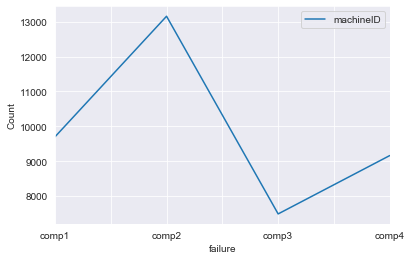

In [32]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
fail_df.groupby(['failure']).sum().plot(kind='line')
plt.ylabel('Count')

In [33]:
fail_df['datetime'].value_counts()

2015-01-02 03:00:00    18
2015-04-02 06:00:00     8
2015-12-09 06:00:00     7
2015-04-20 06:00:00     7
2015-01-20 06:00:00     7
                       ..
2015-02-15 06:00:00     1
2015-09-08 06:00:00     1
2015-05-07 06:00:00     1
2015-03-06 06:00:00     1
2015-08-16 06:00:00     1
Name: datetime, Length: 302, dtype: int64

Text(0, 0.5, 'Count')

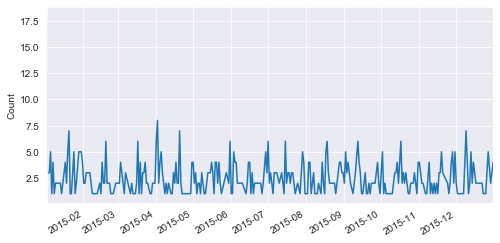

In [34]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
fail_df['datetime'].value_counts().plot(kind='line')
plt.ylabel('Count')

## Maintenance

In [35]:
maint_df.shape

(3286, 3)

In [36]:
maint_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
datetime     3286 non-null object
machineID    3286 non-null int64
comp         3286 non-null object
dtypes: int64(1), object(2)
memory usage: 77.1+ KB


In [37]:
maint_df['datetime'] = pd.to_datetime(maint_df['datetime'], format="%Y-%m-%d %H:%M:%S")
maint_df['comp'] = maint_df['comp'].astype('category')

In [38]:
maint_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
datetime     3286 non-null datetime64[ns]
machineID    3286 non-null int64
comp         3286 non-null category
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 54.9 KB


Text(0, 0.5, 'Count')

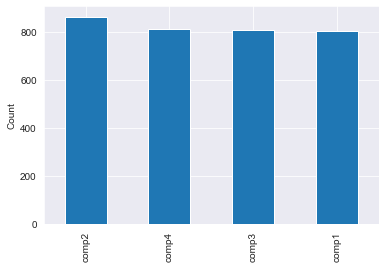

In [39]:
maint_df['comp'].value_counts().plot(kind='bar')
plt.ylabel('Count')

## Lot of maintenance on Comp2 failures since those are the errors occurring very often.

## Errors

### Errors are warnings and are not critical and don't cause failures.

In [40]:
err_df.shape

(3919, 3)

In [41]:
err_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
datetime     3919 non-null object
machineID    3919 non-null int64
errorID      3919 non-null object
dtypes: int64(1), object(2)
memory usage: 92.0+ KB


In [42]:
err_df['datetime'] = pd.to_datetime(err_df['datetime'], format="%Y-%m-%d %H:%M:%S")
err_df['errorID'] = err_df['errorID'].astype('category')

In [43]:
err_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
datetime     3919 non-null datetime64[ns]
machineID    3919 non-null int64
errorID      3919 non-null category
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 65.4 KB


Text(0, 0.5, 'Count')

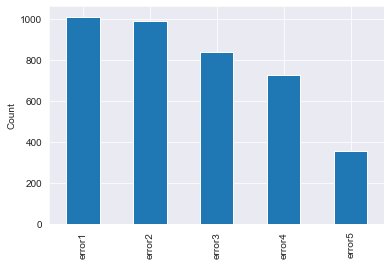

In [44]:
err_df['errorID'].value_counts().plot(kind='bar')
plt.ylabel('Count')

## Machine

In [45]:
mach_df.shape

(100, 3)

In [46]:
mach_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
machineID    100 non-null int64
model        100 non-null object
age          100 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [47]:
mach_df['model'] = mach_df['model'].astype('category')

In [48]:
mach_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
machineID    100 non-null int64
model        100 non-null category
age          100 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.0 KB


In [49]:
mach_df.head(5)

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [50]:
mach_df.groupby(['model'], as_index=False)['age'].count()

,model,age
0,model1,16
1,model2,17
2,model3,35
3,model4,32


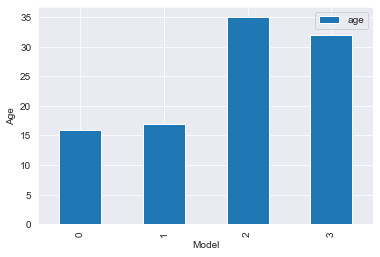

In [51]:
mach_df.groupby(['model'], as_index=False)['age'].count().plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Age')
plt.legend()

### Feature Engineering

In [52]:
tlmtry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
datetime     876100 non-null datetime64[ns]
machineID    876100 non-null int64
volt         876100 non-null float64
rotate       876100 non-null float64
pressure     876100 non-null float64
vibration    876100 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 40.1 MB


In [53]:
tlmtry_df.head(6)

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
5,2015-01-01 11:00:00,1,172.504839,430.323362,95.927042,35.655017


#### Calculate the 3h mean and std

In [54]:
tlmtry_df.head(6)

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
5,2015-01-01 11:00:00,1,172.504839,430.323362,95.927042,35.655017


In [55]:
mtee = []
column = ['volt', 'rotate', 'pressure', 'vibration']
for c in column:
    mtee.append(pd.pivot_table(tlmtry_df,
                               index='datetime',
                               columns='machineID',
                               values=c).resample('3H', closed='left', label='right').mean().unstack())
tlmtry_mean_3h = pd.concat(mtee, axis=1)
tlmtry_mean_3h.columns = [i + '_mean_3h' for i in column ]
tlmtry_mean_3h.reset_index(inplace=True)


In [56]:
# repeat for standard deviation
mtee2 = []
for c in column:
    mtee2.append(pd.pivot_table(tlmtry_df,
                               index='datetime',
                               columns='machineID',
                               values=c).resample('3H', closed='left', label='right').std().unstack())
tlmtry_sd_3h = pd.concat(mtee2, axis=1)
tlmtry_sd_3h.columns = [i + '_sd_3h' for i in column]
tlmtry_sd_3h.reset_index(inplace=True)



In [57]:
tlmtry_mean_3h.head()

,machineID,datetime,volt_mean_3h,rotate_mean_3h,pressure_mean_3h,vibration_mean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


In [58]:
tlmtry_sd_3h.head()

,machineID,datetime,volt_sd_3h,rotate_sd_3h,pressure_sd_3h,vibration_sd_3h
0,1,2015-01-01 09:00:00,6.721032,67.849599,18.934956,5.874970
1,1,2015-01-01 12:00:00,7.596570,50.120452,8.555032,7.662229
2,1,2015-01-01 15:00:00,10.124584,55.084734,5.909721,5.169304
3,1,2015-01-01 18:00:00,4.673269,42.047278,4.554047,2.106108
4,1,2015-01-01 21:00:00,14.752132,47.048609,4.244158,2.207884


In [59]:
mtee3 = []
column = ['volt', 'rotate', 'pressure', 'vibration']
for c in column:
    mtee3.append(pd.pivot_table(tlmtry_df,
                               index='datetime',
                               columns='machineID',
                               values=c).rolling(window=24).mean().resample('3H', closed='left', label='right').first().unstack())
tlmtry_mean_24h = pd.concat(mtee3, axis=1)
tlmtry_mean_24h.columns = [i + '_mean_24h' for i in column ]
tlmtry_mean_24h.reset_index(inplace=True)

In [60]:
tlmtry_mean_24h.head(30)

,machineID,datetime,volt_mean_24h,rotate_mean_24h,pressure_mean_24h,vibration_mean_24h
0,1,2015-01-01 09:00:00,NaN,NaN,NaN,NaN
1,1,2015-01-01 12:00:00,NaN,NaN,NaN,NaN
2,1,2015-01-01 15:00:00,NaN,NaN,NaN,NaN
3,1,2015-01-01 18:00:00,NaN,NaN,NaN,NaN
4,1,2015-01-01 21:00:00,NaN,NaN,NaN,NaN
5,1,2015-01-02 00:00:00,NaN,NaN,NaN,NaN
6,1,2015-01-02 03:00:00,NaN,NaN,NaN,NaN
7,1,2015-01-02 06:00:00,169.733809,445.179865,96.797113,40.385160
8,1,2015-01-02 09:00:00,170.614862,446.364859,96.849785,39.736826
9,1,2015-01-02 12:00:00,169.893965,447.009407,97.715600,39.498374


In [61]:
tlmtry_mean_24h = tlmtry_mean_24h.loc[-tlmtry_mean_24h['volt_mean_24h'].isnull()]

In [62]:
mtee4 = []
column = ['volt', 'rotate', 'pressure', 'vibration']
for c in column:
    mtee4.append(pd.pivot_table(tlmtry_df,
                               index='datetime',
                               columns='machineID',
                               values=c).rolling(window=24).std().resample('3H', closed='left', label='right').first().unstack())
tlmtry_sd_24h = pd.concat(mtee4, axis=1)
tlmtry_sd_24h.columns = [i + '_sd_24h' for i in column ]
tlmtry_sd_24h.reset_index(inplace=True)

In [63]:
tlmtry_sd_24h.head(30)

,machineID,datetime,volt_sd_24h,rotate_sd_24h,pressure_sd_24h,vibration_sd_24h
0,1,2015-01-01 09:00:00,NaN,NaN,NaN,NaN
1,1,2015-01-01 12:00:00,NaN,NaN,NaN,NaN
2,1,2015-01-01 15:00:00,NaN,NaN,NaN,NaN
3,1,2015-01-01 18:00:00,NaN,NaN,NaN,NaN
4,1,2015-01-01 21:00:00,NaN,NaN,NaN,NaN
5,1,2015-01-02 00:00:00,NaN,NaN,NaN,NaN
6,1,2015-01-02 03:00:00,NaN,NaN,NaN,NaN
7,1,2015-01-02 06:00:00,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,13.370357,42.432317,9.471669,6.195076


In [64]:
tlmtry_sd_24h.loc[-tlmtry_sd_24h['volt_sd_24h'].isnull()]

,machineID,datetime,volt_sd_24h,rotate_sd_24h,pressure_sd_24h,vibration_sd_24h
7,1,2015-01-02 06:00:00,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,13.370357,42.432317,9.471669,6.195076
10,1,2015-01-02 15:00:00,13.299281,41.346121,8.731229,5.687944
11,1,2015-01-02 18:00:00,13.954518,43.490234,8.061653,5.898069
...,...,...,...,...,...,...
292095,100,2015-12-31 21:00:00,16.429023,62.147934,7.475540,5.448962
292096,100,2016-01-01 00:00:00,17.019808,64.730136,8.961444,5.833191
292097,100,2016-01-01 03:00:00,17.096392,64.718132,9.420879,5.738756
292098,100,2016-01-01 06:00:00,15.119775,65.929509,8.836617,6.139142


In [65]:
pd.concat([tlmtry_mean_3h,
                            tlmtry_sd_3h.ix[:, 2:6],
                            tlmtry_mean_24h.ix[:, 2:6],
                            tlmtry_sd_24h.ix[:, 2:6]], axis=1)

,machineID,datetime,volt_mean_3h,rotate_mean_3h,pressure_mean_3h,vibration_mean_3h,volt_sd_3h,rotate_sd_3h,pressure_sd_3h,vibration_sd_3h,volt_mean_24h,rotate_mean_24h,pressure_mean_24h,vibration_mean_24h,volt_sd_24h,rotate_sd_24h,pressure_sd_24h,vibration_sd_24h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502,6.721032,67.849599,18.934956,5.874970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891,7.596570,50.120452,8.555032,7.662229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405,10.124584,55.084734,5.909721,5.169304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739,4.673269,42.047278,4.554047,2.106108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542,14.752132,47.048609,4.244158,2.207884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292095,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,171.547643,452.351565,101.789714,39.184285,16.429023,62.147934,7.475540,5.448962
292096,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,168.806645,459.502212,100.919285,38.150193,17.019808,64.730136,8.961444,5.833191
292097,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,169.011763,465.923073,101.568092,39.456302,17.096392,64.718132,9.420879,5.738756
292098,100,2016-01-01 06:00:00,182.525427,435.932056,98.798172,42.757630,14.835200,19.208302,5.002788,6.836757,172.838745,461.095362,101.396728,39.964090,15.119775,65.929509,8.836617,6.139142


In [66]:
pd.concat([tlmtry_mean_3h,
                            tlmtry_sd_3h.ix[:, 2:6],
                            tlmtry_mean_24h.ix[:, 2:6],
                            tlmtry_sd_24h.ix[:, 2:6]], axis=1).dropna()

,machineID,datetime,volt_mean_3h,rotate_mean_3h,pressure_mean_3h,vibration_mean_3h,volt_sd_3h,rotate_sd_3h,pressure_sd_3h,vibration_sd_3h,volt_mean_24h,rotate_mean_24h,pressure_mean_24h,vibration_mean_24h,volt_sd_24h,rotate_sd_24h,pressure_sd_24h,vibration_sd_24h
7,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076
10,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944
11,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292094,100,2015-12-31 18:00:00,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,169.764418,454.478787,100.873360,39.094339,15.331755,60.839923,7.891711,5.269038
292095,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,171.547643,452.351565,101.789714,39.184285,16.429023,62.147934,7.475540,5.448962
292096,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,168.806645,459.502212,100.919285,38.150193,17.019808,64.730136,8.961444,5.833191
292097,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,169.011763,465.923073,101.568092,39.456302,17.096392,64.718132,9.420879,5.738756


In [67]:
# merge columns 
tlmtry_feat_complete = pd.concat([tlmtry_mean_3h,
                            tlmtry_sd_3h.ix[:, 2:6],
                            tlmtry_mean_24h.ix[:, 2:6],
                            tlmtry_sd_24h.ix[:, 2:6]], axis=1).dropna()
tlmtry_feat_complete.head()

,machineID,datetime,volt_mean_3h,rotate_mean_3h,pressure_mean_3h,vibration_mean_3h,volt_sd_3h,rotate_sd_3h,pressure_sd_3h,vibration_sd_3h,volt_mean_24h,rotate_mean_24h,pressure_mean_24h,vibration_mean_24h,volt_sd_24h,rotate_sd_24h,pressure_sd_24h,vibration_sd_24h
7,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076
10,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944
11,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069


 ### Now build the features for errors

In [68]:
pd.get_dummies(err_df)

,datetime,machineID,errorID_error1,errorID_error2,errorID_error3,errorID_error4,errorID_error5
0,2015-01-03 07:00:00,1,1,0,0,0,0
1,2015-01-03 20:00:00,1,0,0,1,0,0
2,2015-01-04 06:00:00,1,0,0,0,0,1
3,2015-01-10 15:00:00,1,0,0,0,1,0
4,2015-01-22 10:00:00,1,0,0,0,1,0
...,...,...,...,...,...,...,...
3914,2015-11-21 08:00:00,100,0,1,0,0,0
3915,2015-12-04 02:00:00,100,1,0,0,0,0
3916,2015-12-08 06:00:00,100,0,1,0,0,0
3917,2015-12-08 06:00:00,100,0,0,1,0,0


In [69]:
err_df.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [70]:

ec = pd.get_dummies(err_df)
ec.columns = ['datetime', 'machineID', 'error1', 'error2', 'error3', 'error4', 'error5']

ec = ec.groupby(['machineID', 'datetime']).sum().reset_index()
ec.head(13)

,machineID,datetime,error1,error2,error3,error4,error5
0,1,2015-01-03 07:00:00,1,0,0,0,0
1,1,2015-01-03 20:00:00,0,0,1,0,0
2,1,2015-01-04 06:00:00,0,0,0,0,1
3,1,2015-01-10 15:00:00,0,0,0,1,0
4,1,2015-01-22 10:00:00,0,0,0,1,0
5,1,2015-01-25 15:00:00,0,0,0,1,0
6,1,2015-01-27 04:00:00,1,0,0,0,0
7,1,2015-03-03 22:00:00,0,1,0,0,0
8,1,2015-03-05 06:00:00,1,0,0,0,0
9,1,2015-03-20 18:00:00,1,0,0,0,0


In [71]:
ec = tlmtry_df[['datetime','machineID']].merge(ec, on=['machineID', 'datetime'], how='left').fillna(0.0)
ec.describe()

,machineID,error1,error2,error3,error4,error5
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,0.001153,0.001128,0.000957,0.000830,0.000406
std,28.866087,0.033934,0.033563,0.030913,0.028795,0.020154
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
mtee5 = []
fields = ['error%d' % i for i in range(1,6)]
for c in fields:
    mtee5.append(pd.pivot_table(ec,
                               index='datetime',
                               columns='machineID',
                               values=c).rolling(window=24).sum().resample('3H',
                                                                           closed='left',
                                                                           label='right').first().unstack())
ec = pd.concat(mtee5, axis=1)
ec.columns = [i + 'count' for i in fields]
ec.reset_index(inplace=True)
ec = ec.dropna()
ec.describe()

,machineID,error1count,error2count,error3count,error4count,error5count
count,291400.00000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000
mean,50.50000,0.027649,0.027069,0.022907,0.019904,0.009753
std,28.86612,0.166273,0.164429,0.151453,0.140820,0.098797
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.50000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.25000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.00000,2.000000,2.000000,2.000000,2.000000,2.000000


### Build the features for comp log maintenance

In [73]:
maint_df.head(25)

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4
5,2015-01-05 06:00:00,1,comp1
6,2015-01-20 06:00:00,1,comp3
7,2015-01-20 06:00:00,1,comp1
8,2015-02-04 06:00:00,1,comp4
9,2015-02-04 06:00:00,1,comp3


In [74]:
cr = pd.get_dummies(maint_df.set_index('datetime')).reset_index()
cr.columns = ['datetime', 'machineID', 'comp1', 'comp2', 'comp3', 'comp4']

cr = cr.groupby(['machineID', 'datetime']).sum().reset_index()


cr = tlmtry_df[['datetime', 'machineID']].merge(cr,on=['datetime', 'machineID'],how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])

components = ['comp1', 'comp2', 'comp3', 'comp4']
for c in components:
    cr.loc[cr[c] < 1, c] = None
    cr.loc[-cr[c].isnull(), c] = cr.loc[-cr[c].isnull(), 'datetime']
    
    cr[c] = cr[c].fillna(method='ffill')
    
cr = cr.loc[cr['datetime'] > pd.to_datetime('2015-01-01')]  

In [75]:
cr.head()

,datetime,machineID,comp1,comp2,comp3,comp4
0,2015-01-01 06:00:00,1,1.418450e+18,1401602400000000000,1.406786e+18,1.405490e+18
1,2015-01-01 07:00:00,1,1.418450e+18,1401602400000000000,1.406786e+18,1.405490e+18
2,2015-01-01 08:00:00,1,1.418450e+18,1401602400000000000,1.406786e+18,1.405490e+18
3,2015-01-01 09:00:00,1,1.418450e+18,1401602400000000000,1.406786e+18,1.405490e+18
4,2015-01-01 10:00:00,1,1.418450e+18,1401602400000000000,1.406786e+18,1.405490e+18


In [76]:
cr.comp1 = cr.comp1.astype('M8[ns]')
cr.comp2 = cr.comp2.astype('M8[ns]')
cr.comp3 = cr.comp3.astype('M8[ns]')
cr.comp4 = cr.comp4.astype('M8[ns]')
#
for c in components:
    cr[c] = (cr['datetime'] - cr[c])/ np.timedelta64(1,'D')

In [77]:
tlmtry_df[['datetime', 'machineID']].merge(cr,on=['datetime', 'machineID'],how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])

,datetime,machineID,comp1,comp2,comp3,comp4
0,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
1,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
2,2015-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333
3,2015-01-01 09:00:00,1,19.125000,214.125000,154.125000,169.125000
4,2015-01-01 10:00:00,1,19.166667,214.166667,154.166667,169.166667
...,...,...,...,...,...,...
876095,2016-01-01 02:00:00,100,82.833333,7.833333,82.833333,52.833333
876096,2016-01-01 03:00:00,100,82.875000,7.875000,82.875000,52.875000
876097,2016-01-01 04:00:00,100,82.916667,7.916667,82.916667,52.916667
876098,2016-01-01 05:00:00,100,82.958333,7.958333,82.958333,52.958333


In [78]:
cr.head()

,datetime,machineID,comp1,comp2,comp3,comp4
0,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
1,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
2,2015-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333
3,2015-01-01 09:00:00,1,19.125000,214.125000,154.125000,169.125000
4,2015-01-01 10:00:00,1,19.166667,214.166667,154.166667,169.166667


In [79]:
features = tlmtry_feat_complete.merge(ec, on=['datetime', 'machineID'], how='left')
features

,machineID,datetime,volt_mean_3h,rotate_mean_3h,pressure_mean_3h,vibration_mean_3h,volt_sd_3h,rotate_sd_3h,pressure_sd_3h,vibration_sd_3h,volt_mean_24h,rotate_mean_24h,pressure_mean_24h,vibration_mean_24h,volt_sd_24h,rotate_sd_24h,pressure_sd_24h,vibration_sd_24h,error1count,error2count,error3count,error4count,error5count
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209,0.0,0.0,0.0,0.0,0.0
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231,0.0,0.0,0.0,0.0,0.0
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076,0.0,0.0,0.0,0.0,0.0
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944,0.0,0.0,0.0,0.0,0.0
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291295,100,2015-12-31 18:00:00,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,169.764418,454.478787,100.873360,39.094339,15.331755,60.839923,7.891711,5.269038,0.0,0.0,0.0,0.0,0.0
291296,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,171.547643,452.351565,101.789714,39.184285,16.429023,62.147934,7.475540,5.448962,0.0,0.0,0.0,0.0,0.0
291297,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,168.806645,459.502212,100.919285,38.150193,17.019808,64.730136,8.961444,5.833191,0.0,0.0,0.0,0.0,0.0
291298,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,169.011763,465.923073,101.568092,39.456302,17.096392,64.718132,9.420879,5.738756,0.0,0.0,0.0,0.0,0.0


In [80]:

features = features.merge(cr, on=['datetime', 'machineID'], how='left')
features

,machineID,datetime,volt_mean_3h,rotate_mean_3h,pressure_mean_3h,vibration_mean_3h,volt_sd_3h,rotate_sd_3h,pressure_sd_3h,vibration_sd_3h,volt_mean_24h,rotate_mean_24h,pressure_mean_24h,vibration_mean_24h,volt_sd_24h,rotate_sd_24h,pressure_sd_24h,vibration_sd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209,0.0,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231,0.0,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076,0.0,0.0,0.0,0.0,0.0,20.250,215.250,155.250,170.250
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944,0.0,0.0,0.0,0.0,0.0,20.375,215.375,155.375,170.375
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069,0.0,0.0,0.0,0.0,0.0,20.500,215.500,155.500,170.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291295,100,2015-12-31 18:00:00,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,169.764418,454.478787,100.873360,39.094339,15.331755,60.839923,7.891711,5.269038,0.0,0.0,0.0,0.0,0.0,82.500,7.500,82.500,52.500
291296,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,171.547643,452.351565,101.789714,39.184285,16.429023,62.147934,7.475540,5.448962,0.0,0.0,0.0,0.0,0.0,82.625,7.625,82.625,52.625
291297,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,168.806645,459.502212,100.919285,38.150193,17.019808,64.730136,8.961444,5.833191,0.0,0.0,0.0,0.0,0.0,82.750,7.750,82.750,52.750
291298,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,169.011763,465.923073,101.568092,39.456302,17.096392,64.718132,9.420879,5.738756,0.0,0.0,0.0,0.0,0.0,82.875,7.875,82.875,52.875


In [81]:
features = features.merge(mach_df, on=['machineID'], how='left')
features

,machineID,datetime,volt_mean_3h,rotate_mean_3h,pressure_mean_3h,vibration_mean_3h,volt_sd_3h,rotate_sd_3h,pressure_sd_3h,vibration_sd_3h,volt_mean_24h,rotate_mean_24h,pressure_mean_24h,vibration_mean_24h,volt_sd_24h,rotate_sd_24h,pressure_sd_24h,vibration_sd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209,0.0,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231,0.0,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076,0.0,0.0,0.0,0.0,0.0,20.250,215.250,155.250,170.250,model3,18
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944,0.0,0.0,0.0,0.0,0.0,20.375,215.375,155.375,170.375,model3,18
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069,0.0,0.0,0.0,0.0,0.0,20.500,215.500,155.500,170.500,model3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291295,100,2015-12-31 18:00:00,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,169.764418,454.478787,100.873360,39.094339,15.331755,60.839923,7.891711,5.269038,0.0,0.0,0.0,0.0,0.0,82.500,7.500,82.500,52.500,model4,5
291296,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,171.547643,452.351565,101.789714,39.184285,16.429023,62.147934,7.475540,5.448962,0.0,0.0,0.0,0.0,0.0,82.625,7.625,82.625,52.625,model4,5
291297,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,168.806645,459.502212,100.919285,38.150193,17.019808,64.730136,8.961444,5.833191,0.0,0.0,0.0,0.0,0.0,82.750,7.750,82.750,52.750,model4,5
291298,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,169.011763,465.923073,101.568092,39.456302,17.096392,64.718132,9.420879,5.738756,0.0,0.0,0.0,0.0,0.0,82.875,7.875,82.875,52.875,model4,5


In [82]:
print(features.head())
features.describe()

   machineID            datetime  volt_mean_3h  rotate_mean_3h  \
0          1 2015-01-02 06:00:00    180.133784      440.608320   
1          1 2015-01-02 09:00:00    176.364293      439.349655   
2          1 2015-01-02 12:00:00    160.384568      424.385316   
3          1 2015-01-02 15:00:00    170.472461      442.933997   
4          1 2015-01-02 18:00:00    163.263806      468.937558   

   pressure_mean_3h  vibration_mean_3h  volt_sd_3h  rotate_sd_3h  \
0         94.137969          41.551544   21.322735     48.770512   
1        101.553209          36.105580   18.952210     51.329636   
2         99.598722          36.094637   13.047080     13.702496   
3        102.380586          40.483002   16.642354     56.290447   
4        102.726648          40.921802   17.424688     38.680380   

   pressure_sd_3h  vibration_sd_3h  volt_mean_24h  rotate_mean_24h  \
0        2.135684        10.037208     169.733809       445.179865   
1       13.789279         6.737739     170.614862     

,machineID,volt_mean_3h,rotate_mean_3h,pressure_mean_3h,vibration_mean_3h,volt_sd_3h,rotate_sd_3h,pressure_sd_3h,vibration_sd_3h,volt_mean_24h,rotate_mean_24h,pressure_mean_24h,vibration_mean_24h,volt_sd_24h,rotate_sd_24h,pressure_sd_24h,vibration_sd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.771416,446.612973,100.855301,40.384328,13.299858,44.456335,8.885822,4.440660,170.772579,446.613440,100.854547,40.384564,14.918849,49.947916,10.046687,5.002065,0.027659,0.027075,0.022901,0.019907,0.009756,53.350748,51.318963,52.512108,53.619118,11.330000
std,28.86612,9.497201,33.122865,7.408854,3.476641,6.966647,23.216421,4.656341,2.320066,4.716970,18.074248,4.733098,2.059861,2.260726,7.682126,1.713726,0.799820,0.166301,0.164446,0.151435,0.140832,0.098813,62.418063,59.140743,58.765904,59.606886,5.827625
min,1.00000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,266.010419,91.057429,35.060087,6.380619,18.385248,4.145308,2.144863,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,164.445576,427.568132,96.238173,38.147839,8.027455,26.903567,5.370647,2.684308,168.070890,441.549802,98.668589,39.354062,13.358663,44.668824,8.924317,4.460347,0.000000,0.000000,0.000000,0.000000,0.000000,13.250000,12.000000,13.000000,12.875000,6.750000
50%,50.50000,170.430790,448.385564,100.233139,40.146085,12.495595,41.795700,8.345785,4.173854,170.210913,449.212554,100.097694,40.072752,14.853948,49.613807,9.921407,4.958594,0.000000,0.000000,0.000000,0.000000,0.000000,32.625000,29.500000,32.125000,32.375000,12.000000
75%,75.25000,176.607051,468.447680,104.404520,42.227392,17.689118,59.103715,11.789645,5.898997,172.459612,456.368008,101.611121,40.833364,16.394764,54.821318,10.980498,5.484480,0.000000,0.000000,0.000000,0.000000,0.000000,68.500000,66.250000,67.000000,70.125000,16.000000
max,100.00000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,499.096975,152.310351,61.932124,27.664538,103.819404,28.654103,12.325783,2.000000,2.000000,2.000000,2.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000


In [83]:
features.describe()

,machineID,volt_mean_3h,rotate_mean_3h,pressure_mean_3h,vibration_mean_3h,volt_sd_3h,rotate_sd_3h,pressure_sd_3h,vibration_sd_3h,volt_mean_24h,rotate_mean_24h,pressure_mean_24h,vibration_mean_24h,volt_sd_24h,rotate_sd_24h,pressure_sd_24h,vibration_sd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.771416,446.612973,100.855301,40.384328,13.299858,44.456335,8.885822,4.440660,170.772579,446.613440,100.854547,40.384564,14.918849,49.947916,10.046687,5.002065,0.027659,0.027075,0.022901,0.019907,0.009756,53.350748,51.318963,52.512108,53.619118,11.330000
std,28.86612,9.497201,33.122865,7.408854,3.476641,6.966647,23.216421,4.656341,2.320066,4.716970,18.074248,4.733098,2.059861,2.260726,7.682126,1.713726,0.799820,0.166301,0.164446,0.151435,0.140832,0.098813,62.418063,59.140743,58.765904,59.606886,5.827625
min,1.00000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,266.010419,91.057429,35.060087,6.380619,18.385248,4.145308,2.144863,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,164.445576,427.568132,96.238173,38.147839,8.027455,26.903567,5.370647,2.684308,168.070890,441.549802,98.668589,39.354062,13.358663,44.668824,8.924317,4.460347,0.000000,0.000000,0.000000,0.000000,0.000000,13.250000,12.000000,13.000000,12.875000,6.750000
50%,50.50000,170.430790,448.385564,100.233139,40.146085,12.495595,41.795700,8.345785,4.173854,170.210913,449.212554,100.097694,40.072752,14.853948,49.613807,9.921407,4.958594,0.000000,0.000000,0.000000,0.000000,0.000000,32.625000,29.500000,32.125000,32.375000,12.000000
75%,75.25000,176.607051,468.447680,104.404520,42.227392,17.689118,59.103715,11.789645,5.898997,172.459612,456.368008,101.611121,40.833364,16.394764,54.821318,10.980498,5.484480,0.000000,0.000000,0.000000,0.000000,0.000000,68.500000,66.250000,67.000000,70.125000,16.000000
max,100.00000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,499.096975,152.310351,61.932124,27.664538,103.819404,28.654103,12.325783,2.000000,2.000000,2.000000,2.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000


### SAVE the file

In [84]:
features.to_csv(training_dataframe = pd.read_csv("./data/cleaned_training_data.csv")

In [85]:
label_features=features.merge(fail_df, on=['datetime', 'machineID'], how='left')

In [86]:
label_features=label_features.fillna(method='bfill',axis=1, limit=7)

In [87]:
label_features=label_features.fillna('none')

In [88]:
label_features.head(50)

,machineID,datetime,volt_mean_3h,rotate_mean_3h,pressure_mean_3h,vibration_mean_3h,volt_sd_3h,rotate_sd_3h,pressure_sd_3h,vibration_sd_3h,volt_mean_24h,rotate_mean_24h,pressure_mean_24h,vibration_mean_24h,volt_sd_24h,rotate_sd_24h,pressure_sd_24h,vibration_sd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209,0.0,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18,none
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231,0.0,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18,none
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076,0.0,0.0,0.0,0.0,0.0,20.250,215.250,155.250,170.250,model3,18,none
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944,0.0,0.0,0.0,0.0,0.0,20.375,215.375,155.375,170.375,model3,18,none
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069,0.0,0.0,0.0,0.0,0.0,20.500,215.500,155.500,170.500,model3,18,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,1,2015-01-07 21:00:00,172.555671,456.282975,92.606962,42.673890,20.288554,35.069210,9.190292,6.256112,171.517124,447.446687,98.677561,42.278115,14.698744,37.410299,11.652345,5.398528,0.0,0.0,0.0,0.0,0.0,2.625,220.625,160.625,2.625,model3,18,none
46,1,2015-01-08 00:00:00,175.159647,419.448131,97.683097,40.173685,9.966679,57.199578,7.585181,6.320375,171.567564,447.577560,97.238932,42.458801,14.842911,35.947987,10.649314,5.667847,0.0,0.0,0.0,0.0,0.0,2.750,220.750,160.750,2.750,model3,18,none
47,1,2015-01-08 03:00:00,163.669832,478.469961,102.899762,39.288107,17.475474,44.034948,13.225798,2.394531,174.220102,447.274766,96.659391,41.318375,10.589617,42.986138,10.656884,5.810930,0.0,0.0,0.0,0.0,0.0,2.875,220.875,160.875,2.875,model3,18,none
48,1,2015-01-08 06:00:00,159.535115,472.634285,102.535037,42.319139,7.129841,33.356082,7.188947,1.722061,172.246332,446.860053,97.807012,41.274008,12.497205,42.525089,10.822939,5.735017,0.0,0.0,0.0,0.0,0.0,3.000,221.000,161.000,3.000,model3,18,none


In [113]:
corr_matrix = tlmtry_df.corr()

In [114]:
corr_matrix

,machineID,volt,rotate,pressure,vibration
machineID,1.000000,-0.001037,0.000171,0.005192,-0.000922
volt,-0.001037,1.000000,-0.001511,0.001652,0.002390
rotate,0.000171,-0.001511,1.000000,-0.000688,-0.003056
pressure,0.005192,0.001652,-0.000688,1.000000,0.001395
vibration,-0.000922,0.002390,-0.003056,0.001395,1.000000


In [115]:
corr_matrix["rotate"].sort_values(ascending=False)

rotate       1.000000
machineID    0.000171
pressure    -0.000688
volt        -0.001511
vibration   -0.003056
Name: rotate, dtype: float64

In [116]:
corr_matrix["vibration"].sort_values(ascending=False)

vibration    1.000000
volt         0.002390
pressure     0.001395
machineID   -0.000922
rotate      -0.003056
Name: vibration, dtype: float64

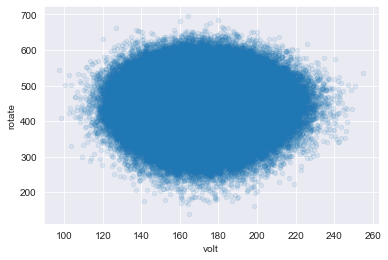

In [120]:
tlmtry_df.plot(kind="scatter", x="volt" , y="rotate" , alpha = 0.1)

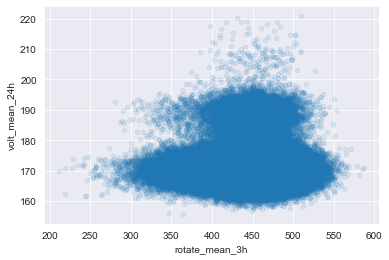

In [123]:
label_features.plot(kind="scatter", x="rotate_mean_3h" , y="volt_mean_24h" , alpha = 0.1)

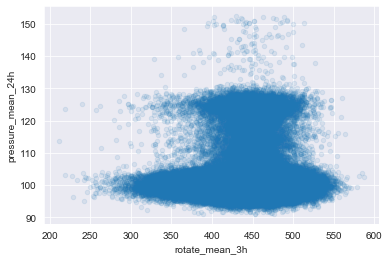

In [124]:
label_features.plot(kind="scatter", x="rotate_mean_3h" , y="pressure_mean_24h" , alpha = 0.1)

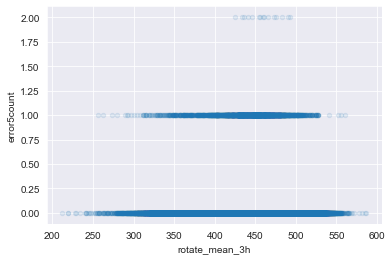

In [125]:
label_features.plot(kind="scatter", x="rotate_mean_3h" , y="error5count" , alpha = 0.1)